# Supervised Object Classification
*Zhiang Chen, March 2017*
- Xazier initialization
- Dropout
- Rectified linear units
- Batch normalization

### 1. Import necessary packages

In [1]:
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
import random
import operator
import time
import os

### 2. Import data

In [3]:
os.chdir('..')
file_name = 'depth_data'
with open(file_name, 'rb') as f:
    save = pickle.load(f)
    train_objects = save['train_objects']
    train_orientations = save['train_orientations']
    train_values = save['train_values']
    valid_objects = save['valid_objects']
    valid_orientations = save['valid_orientations']
    valid_values = save['valid_values']
    test_objects = save['test_objects']
    test_orientations = save['test_orientations']
    test_values = save['test_values']
    value2object = save['value2object']
    object2value = save['object2value']
    del save
    
print('training dataset', train_objects.shape, train_orientations.shape, train_values.shape)
print('validation dataset', valid_objects.shape, valid_orientations.shape, valid_values.shape)
print('testing dataset', test_objects.shape, test_orientations.shape, test_values.shape)

('training dataset', (47520, 11), (47520, 10), (47520, 50, 50))
('validation dataset', (7920, 11), (7920, 10), (7920, 50, 50))
('testing dataset', (7920, 11), (7920, 10), (7920, 50, 50))


### 3. Shuffle data

In [5]:
def randomize(dataset, classes, angles):
    permutation = np.random.permutation(classes.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_classes = classes[permutation]
    shuffled_angles = angles[permutation]
    return shuffled_dataset, shuffled_classes, shuffled_angles

train_dataset, train_classes, train_angles = randomize(train_values, train_objects, train_orientations)
valid_dataset, valid_classes, valid_angles = randomize(valid_values, valid_objects, valid_orientations)
test_dataset, test_classes, test_angles = randomize(test_values, test_objects, test_orientations)

### 4. Verify data

class: stapler
orientation: 144


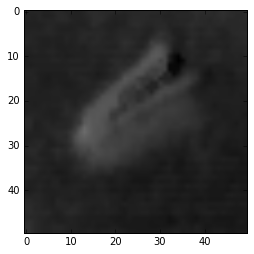

class: gstick
orientation: 0


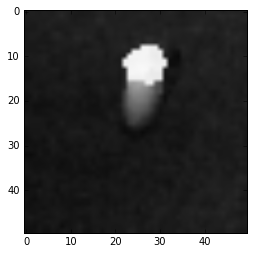

class: stapler
orientation: 108


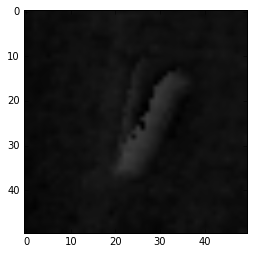

In [19]:
def visualize(dataset, classes, angles, index):
    image = dataset[index,:,:]
    clas = classes[index,:]
    angle = angles[index,:]
    print('class: %s' % value2object[np.argmax(clas)])
    print('orientation: %d' % (np.argmax(angle)*18))
    plt.imshow(image,cmap='Greys_r',vmin=-0.6,vmax=0.4)
    plt.show()
    
visualize(train_dataset, train_classes, train_angles, random.randint(0,train_dataset.shape[0]))
visualize(valid_dataset, valid_classes, valid_angles, random.randint(0,valid_dataset.shape[0]))
visualize(test_dataset, test_classes, test_angles, random.randint(0,test_dataset.shape[0]))